
# Final Project X

Winter 2025 - UCLA, Student: *Name - Last Name*, UCLA ID: 12345689

**Requirements**
- Please don't attach handwritten equations in the report, and don't include equations in this format: r*pi^2. Use an equation editor and paste an image in, or use IPython's built in LaTeX rendering with the single or double dollar sign syntax: $r\pi^2$ $$r\pi^2$$
- Please number all equations, figures and tables. If you don't do this, your grade will be penalized
- If you screenshot the plots or pieces of your code, **make sure the images are perfectly legible**
We hope you can keep your report to no more than two pages, unless otherwise specified. You can evaluate this by looking at the print preview for your notebook in Jupyter Lab/Notebook.


## Task 1

### Introduction

Briefly explain in 1 paragraph (5 lines max.) the problem in your own words. What were you trying to solve?


### Methodology

Show the equations that you will use, if any. **Do not use blurry screenshots or pictures for the equations or any images that you may want to show. Type the equations using an equation editor or IPython's built in LaTeX rendering with the single or double dollar sign syntax.** Here's a good reference for using the built-in rendering <https://jupyterbook.org/en/stable/content/math.html>. To be clear, you can use an equation editor like <https://editor.codecogs.com/> to create an equation _image_, and copy that image in, but make sure the image is clean and legible.

If you want to submit a PDF file as well as a notebook, you'll likely have to follow the instructions here <https://nbconvert.readthedocs.io/en/latest/install.html#installing-tex.> so that the export to pdf functionality can translate the LaTeX. If you want to change the title and author lines in the output pdf, see here <https://stackoverflow.com/questions/66929384/add-notebook-author-and-title-in-jupyter-notebook-cells>. You can open Advanced Tools and edit Notebook metadata with the gear icon in the top right of Jupyter Lab. These steps aren't required, but it would make your report prettier.

Briefly explain the steps you took to solve the problem. Make sure to refer to the equations and models explained in the previous section, if required. The idea is that any person should be able to exactly replicate your work by following these steps.


### Calculations and results

This section should include **all** plots, tables, and printed outputs that are generated in your homework. 

Only include brief comments about the results in this section, for the reader to understand what they are reading. Leave all the interpretations for the next section. You may **import your hwx.py file and use the functions and variables defined within it**, and runnable code cells, to demonstrate these calculations and results. For example:

In [641]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [642]:
df_sensor = pd.read_csv("~/c111/Project/CEE-211-FinalProject/Project/data_files/Copper_Mining_Raw_Sensor_Data.csv")

/var/folders/k_/4t6xljf14hn3r0ql5cpvv9xh0000gn/T/ipykernel_4200/3077651744.py:1: DtypeWarning: Columns (4,5,6,10,11,16,17,18,20,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sensor = pd.read_csv("~/c111/Project/CEE-211-FinalProject/Project/data_files/Copper_Mining_Raw_Sensor_Data.csv")


In [643]:
df_sensor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 23 columns):
 #   Column                         Non-Null Count    Dtype 
---  ------                         --------------    ----- 
 0   Unnamed: 0                     1048575 non-null  int64 
 1   Timestamp                      1048575 non-null  object
 2   Current [I]                    1048575 non-null  object
 3   Shaft Pressure [Ps]            1048575 non-null  object
 4   Return Temperature [Tr]        1048575 non-null  object
 5   Socket Liner Temperature [Tl]  1048575 non-null  object
 6   External Temperature [Te]      1048575 non-null  object
 7   Feeder Temperature [Tf]        1048575 non-null  object
 8   Shaft Temperature [Ts]         1048575 non-null  object
 9   Ring Vibration [RV1]           1048575 non-null  object
 10  Ring Vibration [RV2]           1048575 non-null  object
 11  Ring Vibration [RV3]           1048575 non-null  object
 12  Ring Vibration [RV4]        

In [644]:
date_time = df_sensor["Timestamp"]
date_time = pd.to_datetime(date_time, errors = "coerce")
df_sensor["Timestamp"] = date_time

df_sensor.set_index('Timestamp', inplace=True)  # Set it as the index



# Loop through only `object` columns within the first 30 columns
for col in df_sensor.select_dtypes(include=['object']).columns:
    df_sensor[col] = pd.to_numeric(df_sensor[col], errors = 'coerce')
    
display(df_sensor.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1048575 entries, 2017-07-01 08:00:00 to 2019-09-23 17:14:00
Data columns (total 22 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   Unnamed: 0                     1048575 non-null  int64  
 1   Current [I]                    577976 non-null   float64
 2   Shaft Pressure [Ps]            583546 non-null   float64
 3   Return Temperature [Tr]        583723 non-null   float64
 4   Socket Liner Temperature [Tl]  580902 non-null   float64
 5   External Temperature [Te]      539798 non-null   float64
 6   Feeder Temperature [Tf]        583528 non-null   float64
 7   Shaft Temperature [Ts]         579665 non-null   float64
 8   Ring Vibration [RV1]           583662 non-null   float64
 9   Ring Vibration [RV2]           471738 non-null   float64
 10  Ring Vibration [RV3]           535277 non-null   float64
 11  Ring Vibration [RV4]           583952 non-n

None

In [645]:
nan_count = df_sensor.isna().sum() # axis = 0 is same as axis = index this sums through the rows (or sum of missing numbers per column), axis =1 is same as axis = columns

nan_pct = nan_count/len(df_sensor)

print(nan_count, '\n\n', nan_pct)

Unnamed: 0                            0
Current [I]                      470599
Shaft Pressure [Ps]              465029
Return Temperature [Tr]          464852
Socket Liner Temperature [Tl]    467673
External Temperature [Te]        508777
Feeder Temperature [Tf]          465047
Shaft Temperature [Ts]           468910
Ring Vibration [RV1]             464913
Ring Vibration [RV2]             576837
Ring Vibration [RV3]             513298
Ring Vibration [RV4]             464623
Vessel Level [L]                 659101
Setting [S]                      484482
Current.1                        586624
Weight Meter                     475093
Current.2                        464337
V.Zero                           464636
Current.3                        626208
V.Zero.1                         464335
Current.4                        624130
V.Zero.2                         464321
dtype: int64 

 Unnamed: 0                       0.000000
Current [I]                      0.448799
Shaft Pressure [Ps] 

In [646]:
df_sensor.drop(['Ring Vibration [RV2]','Vessel Level [L]','Current.1','Current.3','Current.4'], axis = 'columns', inplace=True)
#df_sensor = df_sensor.ffill()
df_sensor = df_sensor.dropna(how = "all", inplace = False)

In [647]:
nan_count = df_sensor.isna().sum() # axis = 0 is same as axis = index this sums through the rows (or sum of missing numbers per column), axis =1 is same as axis = columns

nan_pct = nan_count/len(df_sensor)

print(nan_count, '\n\n', nan_pct)

Unnamed: 0                            0
Current [I]                      470599
Shaft Pressure [Ps]              465029
Return Temperature [Tr]          464852
Socket Liner Temperature [Tl]    467673
External Temperature [Te]        508777
Feeder Temperature [Tf]          465047
Shaft Temperature [Ts]           468910
Ring Vibration [RV1]             464913
Ring Vibration [RV3]             513298
Ring Vibration [RV4]             464623
Setting [S]                      484482
Weight Meter                     475093
Current.2                        464337
V.Zero                           464636
V.Zero.1                         464335
V.Zero.2                         464321
dtype: int64 

 Unnamed: 0                       0.000000
Current [I]                      0.448799
Shaft Pressure [Ps]              0.443487
Return Temperature [Tr]          0.443318
Socket Liner Temperature [Tl]    0.446008
External Temperature [Te]        0.485208
Feeder Temperature [Tf]          0.443504
Shaft Temp

Selected Float64 Columns: Index(['Current [I]', 'Shaft Pressure [Ps]', 'Return Temperature [Tr]',
       'Socket Liner Temperature [Tl]', 'External Temperature [Te]',
       'Feeder Temperature [Tf]', 'Shaft Temperature [Ts]',
       'Ring Vibration [RV1]', 'Ring Vibration [RV3]', 'Ring Vibration [RV4]',
       'Setting [S]', 'Weight Meter', 'Current.2', 'V.Zero', 'V.Zero.1',
       'V.Zero.2'],
      dtype='object')


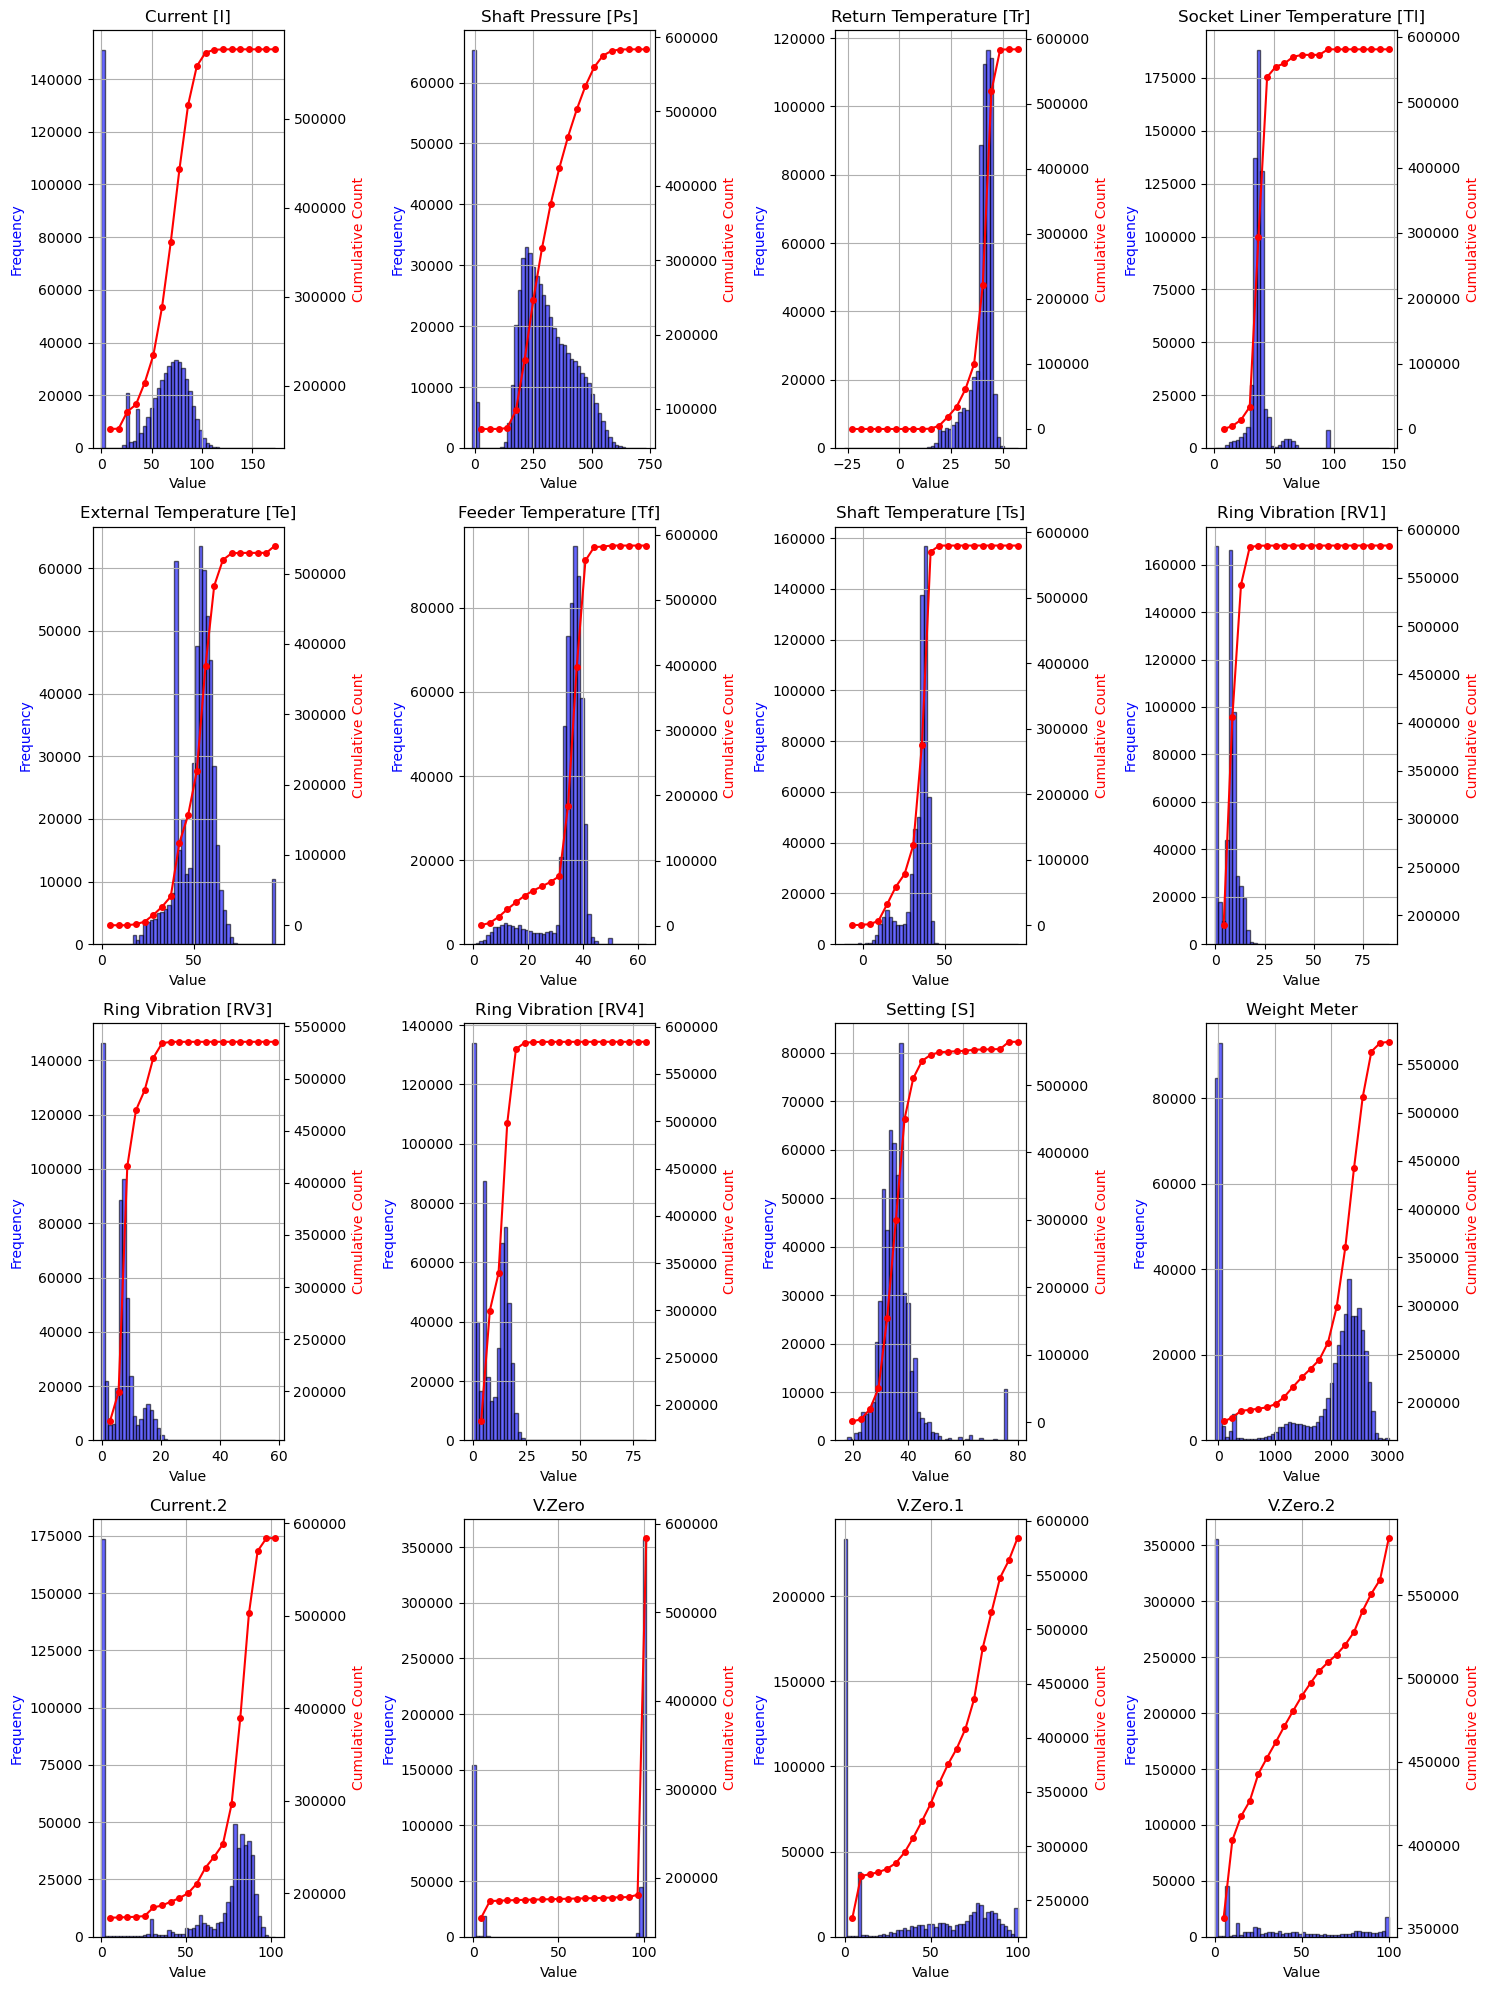

In [648]:
import matplotlib.pyplot as plt
import numpy as np

# Select number of columns to plot per row
num_cols = 4

# Select only float64 columns (excluding non-numeric columns)
selected_cols = df_sensor.select_dtypes(include=['float64']).columns

# Determine the number of rows needed
num_features = len(selected_cols)
num_rows = int(np.ceil(num_features / num_cols))  # Ensure enough rows

# Display selected columns
print("Selected Float64 Columns:", selected_cols)

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))
axes = np.array(axes).reshape(num_rows, num_cols)  # Ensure axes is always 2D

# Loop through each feature and plot both normal and cumulative histograms
for i, col in enumerate(selected_cols):
    row, col_index = divmod(i, num_cols)  # Calculate row and column index
    ax = axes[row, col_index]  # Access subplot properly

    # Drop NaN values before plotting
    col_data = df_sensor[col].dropna()

    # Skip empty columns (all NaN)
    if col_data.empty:
        print(f"Skipping {col}: All values are NaN")
        continue

    # Normal histogram
    col_data.hist(ax=ax, bins=50, alpha=0.6, color='blue', edgecolor='black', density=False)
    ax.set_title(col)
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency", color='blue')

    # Cumulative count overlay (on secondary axis)
    ax2 = ax.twinx()
    counts, bin_edges = np.histogram(col_data, bins=20)
    cumulative_counts = np.cumsum(counts)  # Compute cumulative sum
    ax2.plot(bin_edges[1:], cumulative_counts, color='red', marker='o', linestyle='-', markersize=4, label="Cumulative Count")
    ax2.set_ylabel("Cumulative Count", color='red')

# Remove empty subplots (if num_features < num_rows * num_cols)
for i in range(num_features, num_rows * num_cols):
    row, col_index = divmod(i, num_cols)
    fig.delaxes(axes[row, col_index])  # Remove empty axes

plt.tight_layout()
plt.show()


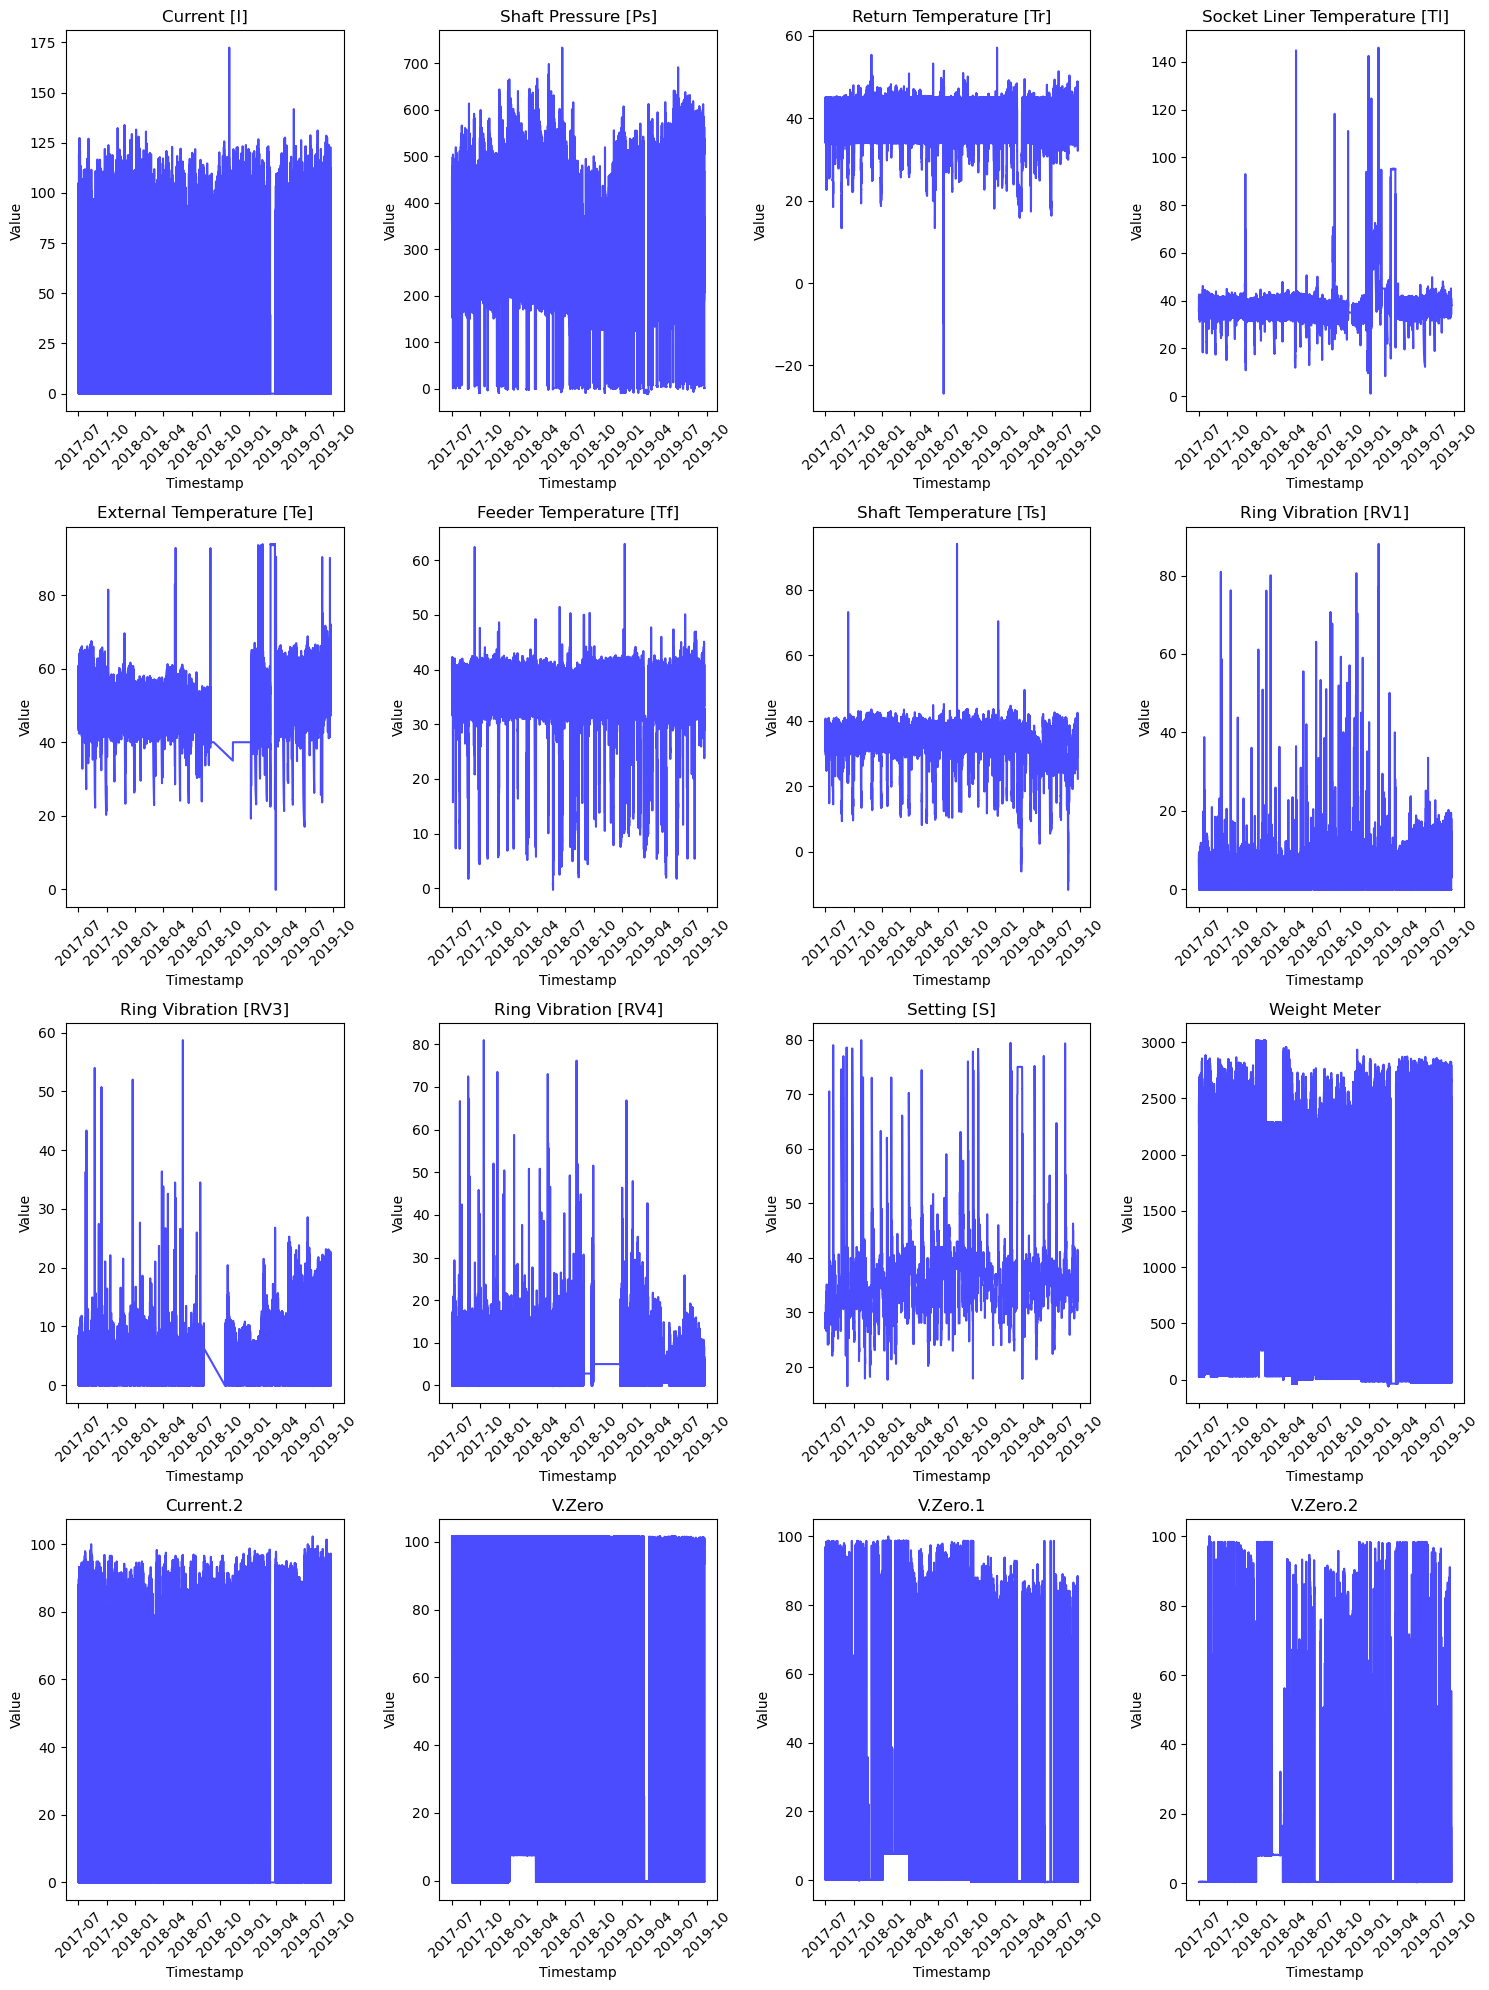

In [649]:
import matplotlib.pyplot as plt
import numpy as np

# Select number of columns per row
num_cols = 4

# Select only float64 columns (excluding non-numeric columns)
selected_cols = df_sensor.select_dtypes(include=['float64']).columns

# Determine number of rows required
num_features = len(selected_cols)
num_rows = int(np.ceil(num_features / num_cols))  # Ensure enough rows

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))
axes = np.array(axes).reshape(num_rows, num_cols)  # Ensure axes is always 2D

# Convert index to a series (for proper alignment)
index_series = pd.Series(df_sensor.index, index=df_sensor.index)

# Loop through each feature and plot it against the index (timestamp)
for i, col in enumerate(selected_cols):
    row, col_index = divmod(i, num_cols)  # Get row and column indices
    ax = axes[row, col_index]  # Access correct subplot

    # Drop NaN values
    col_data = df_sensor[col].dropna()

    # Align data with timestamp index
    aligned_data, aligned_index = col_data.align(index_series, join='inner')

    # Skip empty columns (all NaN)
    if aligned_data.empty:
        print(f"Skipping {col}: All values are NaN")
        continue

    # Convert index to datetime if necessary
    if isinstance(aligned_index, pd.Index) and not isinstance(aligned_index, pd.DatetimeIndex):
        aligned_index = pd.to_datetime(aligned_index)

    # Plot aligned data
    ax.plot(aligned_index, aligned_data, color='blue', alpha=0.7)
    ax.set_title(col)
    ax.set_xlabel("Timestamp")
    ax.set_ylabel("Value")

    # Rotate x-axis labels for better readability
    ax.tick_params(axis='x', rotation=45)

# Remove empty subplots (if num_features < num_rows * num_cols)
for i in range(num_features, num_rows * num_cols):
    row, col_index = divmod(i, num_cols)
    fig.delaxes(axes[row, col_index])  # Remove empty axes

plt.tight_layout()
plt.show()


In [650]:
df_sensor = df_sensor.dropna()


### Discussions and conclusions

Conclude and explain the meaning of the results from the previous section. **Answer any questions posed in the problem statement.** Feel free to include extra analysis.

In [651]:
df_down = pd.read_csv("~/c111/Project/CEE-211-FinalProject/Project/data_files/Downtime_Events.csv")

In [652]:
df_down.head()

Unnamed: 0  Day Downtime Event Type   Equipment                Start  \
0           0    2             Failure  130-CV-004  2017-01-02 12:42:40   
1           1    2         Operational  130-FE-006  2017-01-02 14:47:50   
2           2    2             Failure  130-CV-004  2017-01-02 16:10:02   
3           3    2         Operational  130-FE-006  2017-01-03 01:58:20   
4           4    2    Under Stock Mine       Plant  2017-01-03 05:21:30   

                   End  Downtime (hours)  Downtime Type  Month  Year  \
0  2017-01-02 13:05:50          0.386111              1      1  2017   
1  2017-01-02 14:51:02          0.053333              0      1  2017   
2  2017-01-03 00:32:50          8.380000              1      1  2017   
3  2017-01-03 02:08:02          0.161667              0      1  2017   
4  2017-01-03 05:46:50          0.422222              0      1  2017   

   Health State  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN

In [653]:
#Check for nan % for each feature to ensure removing NaNs indiscriminately does not bias the data
nan_count = df_down.isna().sum(axis = 'index') # axis = 0 is same as axis = index this sums through the rows (or sum of missing numbers per column), axis =1 is same as axis = columns

nan_pct = nan_count/len(df_down)

print(nan_count, '\n\n', nan_pct)

Unnamed: 0                0
Day                       0
Downtime Event Type       0
Equipment                 0
Start                     0
End                       0
Downtime (hours)          0
Downtime Type             0
Month                     0
Year                      0
Health State           2595
dtype: int64 

 Unnamed: 0             0.0
Day                    0.0
Downtime Event Type    0.0
Equipment              0.0
Start                  0.0
End                    0.0
Downtime (hours)       0.0
Downtime Type          0.0
Month                  0.0
Year                   0.0
Health State           1.0
dtype: float64


In [654]:
df_down.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2595 entries, 0 to 2594
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2595 non-null   int64  
 1   Day                  2595 non-null   int64  
 2   Downtime Event Type  2595 non-null   object 
 3   Equipment            2595 non-null   object 
 4   Start                2595 non-null   object 
 5   End                  2595 non-null   object 
 6   Downtime (hours)     2595 non-null   float64
 7   Downtime Type        2595 non-null   int64  
 8   Month                2595 non-null   int64  
 9   Year                 2595 non-null   int64  
 10  Health State         0 non-null      float64
dtypes: float64(2), int64(5), object(4)
memory usage: 223.1+ KB


In [655]:
df_down["Equipment"].unique()

array(['130-CV-004', '130-FE-006', 'Plant', '140-CR-004', '140-CV-008',
       '140-SN-003', '130-FE-007'], dtype=object)

In [656]:
df_down["Downtime Event Type"].unique()

array(['Failure', 'Operational', 'Under Stock Mine',
       'Scheduled Maintenance', 'External',
       'Delayed Scheduled Maintenance'], dtype=object)

In [657]:
df_down["Downtime Type"].unique()

array([1, 0])

In [658]:
df_down["Day"].unique()

array([ 2,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20,
       21, 23, 24, 25, 27, 29, 31,  1,  3, 15, 22, 26, 28, 30])

In [659]:
df_down = df_down.drop(columns=["Unnamed: 0","Downtime Type","Day","Month","Year"])

In [660]:
df_down['Health State'] = df_down['Health State'].fillna(0)

In [661]:
# Replace crusher code with 1, replacing everything else with 0.
df_down['Equipment'] = np.where(df_down['Equipment'] == '140-CR-004', 1, 0)
df_down['Equipment'] = df_down['Equipment'].astype(int)
df_down['Equipment'].unique()
                                              

array([0, 1])

In [662]:
df_down['Equipment'].unique()

array([0, 1])

In [663]:
# Replace Failure Code with 2, Operational Code with 1, replacing everything else with 0.
df_down['Downtime Event Type'] = np.where(df_down['Downtime Event Type'] == 'Failure', 2, 
                    np.where(df_down['Downtime Event Type'] == 'Operational', 1, 0))
df_down['Downtime Event Type'] = df_down['Downtime Event Type'].astype(int)

In [664]:
df_down['Downtime Event Type'].unique()

array([2, 1, 0])

In [665]:
# Apply conditions and assign integer values
df_down.loc[(df_down['Equipment'] == 1) & (df_down['Downtime Event Type'] == 2), 'Health State'] = 3

In [666]:
# Apply condition correctly using parentheses
df_down.loc[(df_down['Equipment'] != 1) & (df_down['Downtime Event Type'] == 2), 'Health State'] = 1

In [667]:
# Apply condition correctly using parentheses
df_down.loc[(df_down['Downtime Event Type'] != 1) & (df_down['Downtime Event Type'] != 2), 'Health State'] = 1

In [668]:
df_down['Health State'] = df_down['Health State'].astype(int)
df_down['Health State'].unique()

array([1, 0, 3])

In [669]:
print("Unique values in 'Health State':", df_down['Health State'].unique())
print("Data type of 'Health State':", df_down['Health State'].dtype)

Unique values in 'Health State': [1 0 3]
Data type of 'Health State': int64


In [670]:
import pandas as pd

# Ensure datetime format
df_sensor = df_sensor.sort_index()  # Sort timestamps for efficient lookup
df_down['Start'] = pd.to_datetime(df_down['Start'])
df_down['End'] = pd.to_datetime(df_down['End'])

# Initialize 'Health State' in df_sensor
df_sensor['Health State'] = 0  # Default state

# Loop through df_down to assign Health States
for _, row in df_down.iterrows():
    start_time = row['Start']
    end_time = row['End']
    health_state = row['Health State']
    
    # Assign main Health State (if within downtime window)
    mask_main = (df_sensor.index >= start_time) & (df_sensor.index <= end_time)
    df_sensor.loc[mask_main, 'Health State'] = health_state

    # Assign pre-failure Health State (12 hours before failure event)
    if health_state == 3:  # If this row represents a failure event
        pre_failure_start = start_time - pd.Timedelta(hours=4)
        mask_pre_failure = (df_sensor.index >= pre_failure_start) & (df_sensor.index < start_time)
        df_sensor.loc[mask_pre_failure, 'Health State'] = 2  # Assign Health State 2

# Verify result
print(df_sensor['Health State'].value_counts())  # Check the distribution of states
print(df_sensor.head())  # Preview data



Health State
0    410291
1     49974
2      9395
3      8615
Name: count, dtype: int64
                     Unnamed: 0  Current [I]  Shaft Pressure [Ps]  \
Timestamp                                                           
2017-07-01 08:00:00           0    67.053070           362.781250   
2017-07-01 08:02:00           1    59.177505           387.683594   
2017-07-01 08:04:00           2    63.528282           305.914062   
2017-07-01 08:06:00           3    65.614792           360.429688   
2017-07-01 08:08:00           4    68.345924           318.992188   

                     Return Temperature [Tr]  Socket Liner Temperature [Tl]  \
Timestamp                                                                     
2017-07-01 08:00:00                39.607815                      36.288490   
2017-07-01 08:02:00                39.496250                      36.196407   
2017-07-01 08:04:00                39.351486                      36.129932   
2017-07-01 08:06:00               

In [671]:
#Check for nan % for each feature to ensure removing NaNs indiscriminately does not bias the data
nan_count = df_sensor.isna().sum(axis = 'index') # axis = 0 is same as axis = index this sums through the rows (or sum of missing numbers per column), axis =1 is same as axis = columns

nan_pct = nan_count/len(df_sensor)

print(nan_count, '\n\n', nan_pct)

Unnamed: 0                       0
Current [I]                      0
Shaft Pressure [Ps]              0
Return Temperature [Tr]          0
Socket Liner Temperature [Tl]    0
External Temperature [Te]        0
Feeder Temperature [Tf]          0
Shaft Temperature [Ts]           0
Ring Vibration [RV1]             0
Ring Vibration [RV3]             0
Ring Vibration [RV4]             0
Setting [S]                      0
Weight Meter                     0
Current.2                        0
V.Zero                           0
V.Zero.1                         0
V.Zero.2                         0
Health State                     0
dtype: int64 

 Unnamed: 0                       0.0
Current [I]                      0.0
Shaft Pressure [Ps]              0.0
Return Temperature [Tr]          0.0
Socket Liner Temperature [Tl]    0.0
External Temperature [Te]        0.0
Feeder Temperature [Tf]          0.0
Shaft Temperature [Ts]           0.0
Ring Vibration [RV1]             0.0
Ring Vibration [RV3] 

In [672]:
Operational = df_sensor[df_sensor['Health State'] == 0]
Pause = df_sensor[df_sensor['Health State'] == 1]
Degrading = df_sensor[df_sensor['Health State'] == 2]
Failure = df_sensor[df_sensor['Health State'] == 3]

In [673]:
# Time domain features

# Define a function to extract time domain features of a signal:
def features_time_domain(data, Nt, L, l):
    """ 
    data: NumPy ndarray with the signal
    Nt: number of time windows
    L: Length of each time window
    l: overlap between any two time windows

    It returns:
    features: NumPy ndarray with the time domain features
    """


    features = np.zeros((Nt,6))

    for i in range(1, Nt + 1):
        start = (i - 1) * L - (i - 1) * l + 1
        end = i * L - (i - 1) * l

        features[i - 1, 0] = sqrt(mean(square(data[start:end]))) # RMS
        features[i - 1, 1] = np.amax(data[start:end]) # Peak
        features[i - 1, 2] = np.amax(data[start:end]) - np.amin(data[start:end]) # Peak-Peak
        features[i - 1, 3] = features[i - 1, 1]/features[i - 1, 0] # Crest
        features[i - 1, 4] = np.mean(data[start:end]) # Mean
        #features[i - 1, 5] = np.var(data[start:end]) # Var
        #features[i - 1, 5] = skew(data[start:end])[0] # Skewness
        features[i - 1, 5] = kurtosis(data[start:end])[0] # Kurtosis

    return features


In [728]:
# Import required libraries:
import scipy.io as sio
import math
from scipy.stats import kurtosis, skew
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import mean, sqrt, square
from scipy.fftpack import fft, fftfreq

No=len(Operational)
Np=len(Pause)
Nd=len(Degrading)
Nf=len(Failure)

# Length of each window:
L = 2500

# Overlap between windows:
l = 2450

# Number of windows (segments):
Nto = math.floor((No - l) / (L - l))
Ntp = math.floor((Np - l) / (L - l))
Ntd = math.floor((Nd - l) / (L - l))
Ntf = math.floor((Nf - l) / (L - l))
Po = features_time_domain(Operational, Nto, L, l)
Pp = features_time_domain(Pause, Ntp, L, l)
Pd = features_time_domain(Degrading, Ntd, L, l)
Pf = features_time_domain(Failure, Ntf, L, l)

/var/folders/k_/4t6xljf14hn3r0ql5cpvv9xh0000gn/T/ipykernel_4200/315818514.py:29: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  features[i - 1, 5] = kurtosis(data[start:end])[0] # Kurtosis


/var/folders/k_/4t6xljf14hn3r0ql5cpvv9xh0000gn/T/ipykernel_4200/4268629688.py:90: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


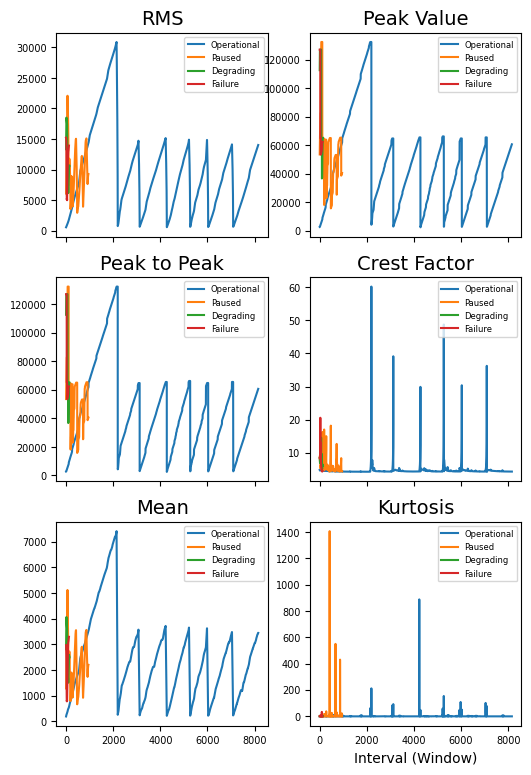

In [729]:
# Plot the time domain features extracted from the raw acceleration data
# for the three ball bearings' health states: Normal, Inner Race Fault, Outer Race Fault
fig, axes = plt.subplots(nrows = 3, ncols = 2, sharex = 'col', figsize = (6, 9))


# Setup the plots per axes:
ax = axes[0][0]
ax.plot(Po[:, 0])
ax.plot(Pp[:, 0])
ax.plot(Pd[:, 0])
ax.plot(Pf[:, 0])
ax.tick_params(axis = 'both', which = 'major', labelsize = 7)
ax.legend(['Operational','Paused','Degrading', 'Failure'], fontsize = 6)
ax.set_title('RMS', fontsize = 14)
#ax.set_yscale('log')
#ax.set_ylim([5e-2,5.5e-2])

ax = axes[0][1]
ax.plot(Po[:, 1])
ax.plot(Pp[:, 1])
ax.plot(Pd[:, 1])
ax.plot(Pf[:, 1])
ax.tick_params(axis = 'both', which = 'major', labelsize = 7)
ax.legend(['Operational','Paused','Degrading', 'Failure'], fontsize = 6)
ax.set_title('Peak Value', fontsize = 14)

ax = axes[1][0]
ax.plot(Po[:, 2])
ax.plot(Pp[:, 2])
ax.plot(Pd[:, 2])
ax.plot(Pf[:, 2])
ax.tick_params(axis = 'both', which = 'major', labelsize = 7)
ax.legend(['Operational','Paused','Degrading', 'Failure'], fontsize = 6)
#ax.set(xlabel = 'Interval (Window)')
ax.set_title('Peak to Peak', fontsize = 14)

ax = axes[1][1]
ax.plot(Po[:, 3])
ax.plot(Pp[:, 3])
ax.plot(Pd[:, 3])
ax.plot(Pf[:, 3])
ax.tick_params(axis = 'both', which = 'major', labelsize = 7)
ax.legend(['Operational','Paused','Degrading', 'Failure'], fontsize = 6)
#ax.set(xlabel = 'Interval (Window)')
ax.set_title('Crest Factor', fontsize = 14)

ax = axes[2][0]
ax.plot(Po[:, 4])
ax.plot(Pp[:, 4])
ax.plot(Pd[:, 4])
ax.plot(Pf[:, 4])
ax.tick_params(axis = 'both', which = 'major', labelsize = 7)
ax.legend(['Operational','Paused','Degrading', 'Failure'], fontsize = 6)
#ax.set(xlabel = 'Interval (Window)')
ax.set_title('Mean', fontsize = 14)
#ax.set_yscale('log')
#ax.set_ylim([1e-8,1e-2])

#ax = axes[2][1]
#ax.plot(Po[:, 5])
#ax.plot(Pp[:, 5])
#ax.plot(Pd[:, 5])
#ax.plot(Pf[:, 5])
#ax.tick_params(axis = 'both', which = 'major', labelsize = 7)
#ax.legend(['Operational','Paused','Degrading', 'Failure'], fontsize = 6)
##ax.set(xlabel = 'Interval (Window)')
#ax.set_title('Skewness', fontsize = 14)

ax = axes[2][1]
ax.plot(Po[:, 5])
ax.plot(Pp[:, 5])
ax.plot(Pd[:, 5])
ax.plot(Pf[:, 5])
ax.tick_params(axis = 'both', which = 'major', labelsize = 7)
ax.legend(['Operational','Paused','Degrading', 'Failure'], fontsize = 6)
ax.set(xlabel = 'Interval (Window)')
ax.set_title('Kurtosis', fontsize = 14)

#ax = axes[3][1]
#ax.plot(Pn[:, 7])
#ax.plot(Po[:, 7])
#ax.plot(Pi[:, 7])
#ax.plot(Pb[:, 7])
#ax.plot(Pc[:, 7])
#ax.tick_params(axis = 'both', which = 'major', labelsize = 7)
#ax.legend(['Normal','Outer Race Damage','Inner Race Damage', 'Ball', 'Combined'], fontsize = 6)
#ax.set(xlabel = 'Interval (Window)')
#ax.set_title('Kurtosis', fontsize = 14)

fig.show()


In [730]:


# We prepare the features data to be used in machine learning models for classification:
columns_time_f = ["RMS", "Peak", "Peak_Peak", "Crest", "Mean", "Kurtosis"]

# Time domain:
df_time_f_operational = pd.DataFrame(Po, columns = columns_time_f)
df_time_f_pause = pd.DataFrame(Pp, columns = columns_time_f)
df_time_f_degrading = pd.DataFrame(Pd, columns = columns_time_f)
df_time_f_failure = pd.DataFrame(Pf, columns = columns_time_f)

df_time_f_operational["Health_State"] = [0] * Po.shape[0]
df_time_f_pause["Health_State"] = [1] * Pp.shape[0]
df_time_f_degrading["Health_State"] = [2] * Pd.shape[0]
df_time_f_failure["Health_State"] = [3] * Pf.shape[0]

df_time = pd.concat([df_time_f_operational, df_time_f_pause, df_time_f_degrading, df_time_f_failure], axis = 'index', join = 'outer', ignore_index = True)


# We have duplicated "Health_State" column, so we drop one of them:
df_all = df_time.iloc[:, [0, 1, 2, 3, 4, 5, 6]]

display(df_all)

# Save the DataFrame with the features and labels to a CSV file:
df_all.to_csv("Crusher_Flat_Features_Labels.csv", index = False)



RMS          Peak     Peak_Peak     Crest         Mean  \
0       557.294663   2709.969482   2710.435093  4.862723   193.332635   
1       564.276827   2709.969482   2710.435093  4.802553   196.318299   
2       569.575148   2709.969482   2710.435093  4.757879   198.559444   
3       574.540133   2709.969482   2710.435093  4.716763   200.612726   
4       578.917497   2709.969482   2710.435093  4.681098   202.195586   
...            ...           ...           ...       ...          ...   
9362  13788.825434  62170.000000  62205.997833  4.508723  3262.852612   
9363  13822.227907  62234.000000  62269.997833  4.502458  3270.795291   
9364  13854.978228  62284.000000  62319.997833  4.495424  3278.590901   
9365  13887.679007  62334.000000  62369.997833  4.488439  3286.386675   
9366  13920.332042  62384.000000  62419.997833  4.481502  3294.260695   

      Kurtosis  Health_State  
0    -1.200370             0  
1    -1.200453             0  
2    -1.200527             0  
3    -1.200591             0  
4    -1.200642             0  
...        ...           ...  
9362 -1.674933             3  
9363 -1.723992             3  
9364 -1.758428             3  
9365 -1.781609             3  
9366 -1.793969             3  

[9367 rows x 7 columns]

In [731]:
# Split DataFrame into features and lables DataFrames:
df_features = df_all.iloc[:, 0:6]
df_labels = df_all.iloc[:, 6]

# Convert DataFrames to Numpy arrays:
np_features = df_features.to_numpy()
np_labels = df_labels.to_numpy()

print(f"Ball bearings features array: {np_features.shape}")
print(f"Ball bearings labels array: {np_labels.shape}")

Ball bearings features array: (9367, 6)
Ball bearings labels array: (9367,)


In [732]:
# 1. Import the required libraries:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
# 3a. Split dataset into training set and test set:
x_train, x_test, y_train, y_test = train_test_split(np_features, 
                                                    np_labels, 
                                                    test_size = 0.3, random_state = 42, 
                                                    shuffle = True)

print(f"{x_train.shape = }")
print(f"{y_train.shape = }")
print(f"{x_test.shape = }")
print(f"{y_test.shape = }")

x_train.shape = (6556, 6)
y_train.shape = (6556,)
x_test.shape = (2811, 6)
y_test.shape = (2811,)


In [733]:
# 3b. Standarize the features:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [734]:

from sklearn.tree import DecisionTreeClassifier
# 4. Choose a classification algorithm:
model_dtc = DecisionTreeClassifier(criterion = 'entropy', 
                               max_depth = 5, 
                               min_samples_split = 2, 
                               min_samples_leaf = 1, 
                               min_impurity_decrease = 0, 
                               random_state = 42,
                              class_weight='balanced')
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,   # Number of trees
                               criterion='entropy', # Same as DecisionTree
                               max_depth=5, 
                               min_samples_split=2, 
                               min_samples_leaf=1, 
                               min_impurity_decrease=0, 
                               random_state=42,
                               class_weight='balanced', # Auto-balances class weights
                               n_jobs=-1)

In [735]:
# 5. Fit (train) the model to the training dataset:
model.fit(x_train, y_train)

# Check performance on the train dataset:
score = model.score(x_train, y_train)
print(f"Accuracy on train dataset: {score:.2%}")

Accuracy on train dataset: 93.03%


In [736]:
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
# 6. Evaluate the model on the test dataset:

# Get the model's predictions for the test dataset:
y_pred = model.predict(x_test)

# Get and print a classification report: performance metrics on the test dataset
labels_names = ['Operational', 'Pause', 'Degrading', 'Failure']
print(classification_report(y_test, y_pred, target_names = labels_names, digits = 4))

# Important! If the dataset is unbalanced, calculate the "balanced accuracy":
print(f"Balanced Accurancy: {balanced_accuracy_score(y_test, y_pred):.5f}")
print(f"Unbalanced Accurancy: {accuracy_score(y_test, y_pred):.5f}")

              precision    recall  f1-score   support

 Operational     0.9934    0.9267    0.9589      2455
       Pause     0.5833    0.8390    0.6882       267
   Degrading     0.6557    0.9524    0.7767        42
     Failure     0.6184    1.0000    0.7642        47

    accuracy                         0.9200      2811
   macro avg     0.7127    0.9295    0.7970      2811
weighted avg     0.9432    0.9200    0.9272      2811

Balanced Accurancy: 0.92950
Unbalanced Accurancy: 0.91996


<Figure size 640x480 with 0 Axes>

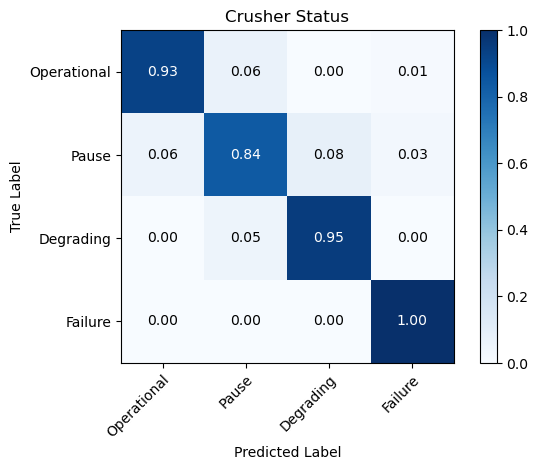

In [737]:
# Calculate and show the Confusion Matrix:
plt.figure()

plot_confusion_matrix(y_test, 
                      y_pred, 
                      classes = labels_names, 
                      normalize = True, 
                      title = "Crusher Status")
plt.show()


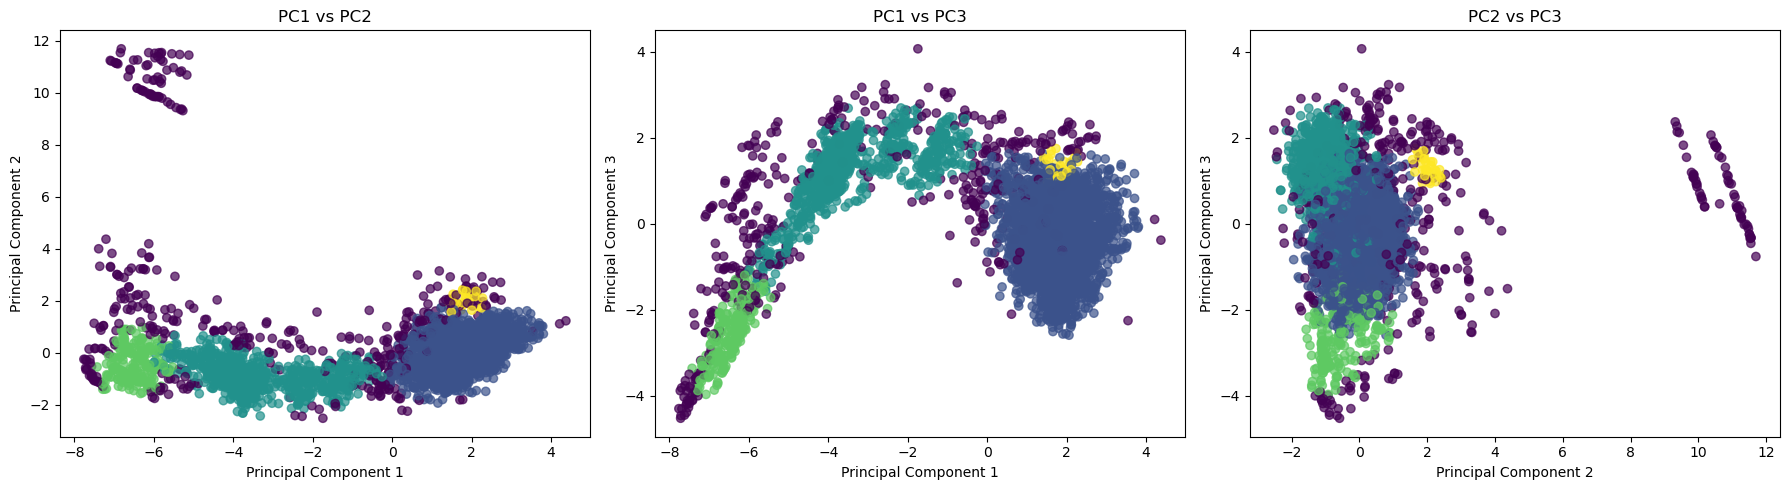

In [610]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import IncrementalPCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Set a limit on how many points to process
SAMPLE_SIZE = 5000  # Reduce the number of points for DBSCAN & visualization

# Step 1: Downsample Data Before Processing (Prevents High Memory Usage)
df_sampled = df_sensor.sample(n=min(SAMPLE_SIZE * 5, len(df_sensor)), random_state=42)

# Step 2: Standardize the Data (Only Process Sampled Data)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_sampled)

# Step 3: Use Incremental PCA (More Memory-Efficient)
pca = IncrementalPCA(n_components=3, batch_size=2000)  # Batch processing to reduce memory load
df_pca = pca.fit_transform(df_scaled)

# Convert PCA result to DataFrame
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2', 'PC3'])

# Step 4: Apply DBSCAN Clustering (Use Parallel Processing)
dbscan = DBSCAN(eps=0.55, min_samples=150, n_jobs=-1)  # Tune parameters for better efficiency
df_pca['Cluster'] = dbscan.fit_predict(df_pca)

# Step 5: Downsample Data Again for Plotting
df_pca_sampled = df_pca.sample(n=min(SAMPLE_SIZE, len(df_pca)), random_state=42)

# Convert -1 cluster (outliers) to a separate category
df_pca_sampled['Cluster'] = df_pca_sampled['Cluster'].astype(str)  # Convert to string for coloring

# Step 6: Create Multiple 2D Projection Plots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# PC1 vs PC2
axes[0].scatter(df_pca_sampled['PC1'], df_pca_sampled['PC2'], c=pd.to_numeric(df_pca_sampled['Cluster']), cmap='viridis', alpha=0.7)
axes[0].set_xlabel("Principal Component 1")
axes[0].set_ylabel("Principal Component 2")
axes[0].set_title("PC1 vs PC2")

# PC1 vs PC3
axes[1].scatter(df_pca_sampled['PC1'], df_pca_sampled['PC3'], c=pd.to_numeric(df_pca_sampled['Cluster']), cmap='viridis', alpha=0.7)
axes[1].set_xlabel("Principal Component 1")
axes[1].set_ylabel("Principal Component 3")
axes[1].set_title("PC1 vs PC3")

# PC2 vs PC3
axes[2].scatter(df_pca_sampled['PC2'], df_pca_sampled['PC3'], c=pd.to_numeric(df_pca_sampled['Cluster']), cmap='viridis', alpha=0.7)
axes[2].set_xlabel("Principal Component 2")
axes[2].set_ylabel("Principal Component 3")
axes[2].set_title("PC2 vs PC3")

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Custom Confusion Matrix Plot Function
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        title = 'Normalized Confusion Matrix' if normalize else 'Confusion Matrix (Unnormalized)'

    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)

    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True Label',
           xlabel='Predicted Label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")

    fig.tight_layout()
    return ax

# Step 1: Check Class Distribution
print("Class Distribution Before Splitting:")
print(df_sensor['Health State'].value_counts())

# Step 2: Split Data into Train and Test Sets
features = df_sensor.drop(columns=['Health State'])
labels = df_sensor['Health State']

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42, stratify=labels)

# Step 3: Standardize Features (No PCA, No SMOTE)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Step 4: Train Logistic Regression Model
model_lr = LogisticRegression(random_state=42, class_weight='balanced', max_iter=200)
model_lr.fit(x_train_scaled, y_train)

# Step 5: Make Predictions
y_pred = model_lr.predict(x_test_scaled)

# Step 6: Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 7: Plot Confusion Matrix
plot_confusion_matrix(y_test, y_pred, classes=['Operational', 'Pause', 'Degrading', 'Failure'], normalize=True)
plt.show()
